
## Assessment of damage connected with Russia's invasion of Ukrain
The datasets used in the assessment were attained from 

In [ ]:
import pandas
russian_personnel = pandas.read_csv('russia_losses_personnel.csv')
russian_equipment = pandas.read_csv('russia_losses_equipment.csv')

In [56]:
russian_personnel

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200
5,2022-03-02,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-03-04,9,9166,about,200
8,2022-03-05,10,10000,about,216
9,2022-03-06,11,11000,about,232


In [57]:
russian_equipment

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,NaN,NaN


### Problem 1
##### Where is the war happening?

C:\Users\SONYA\AppData\Local\Temp\ipykernel_4364\1763128814.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



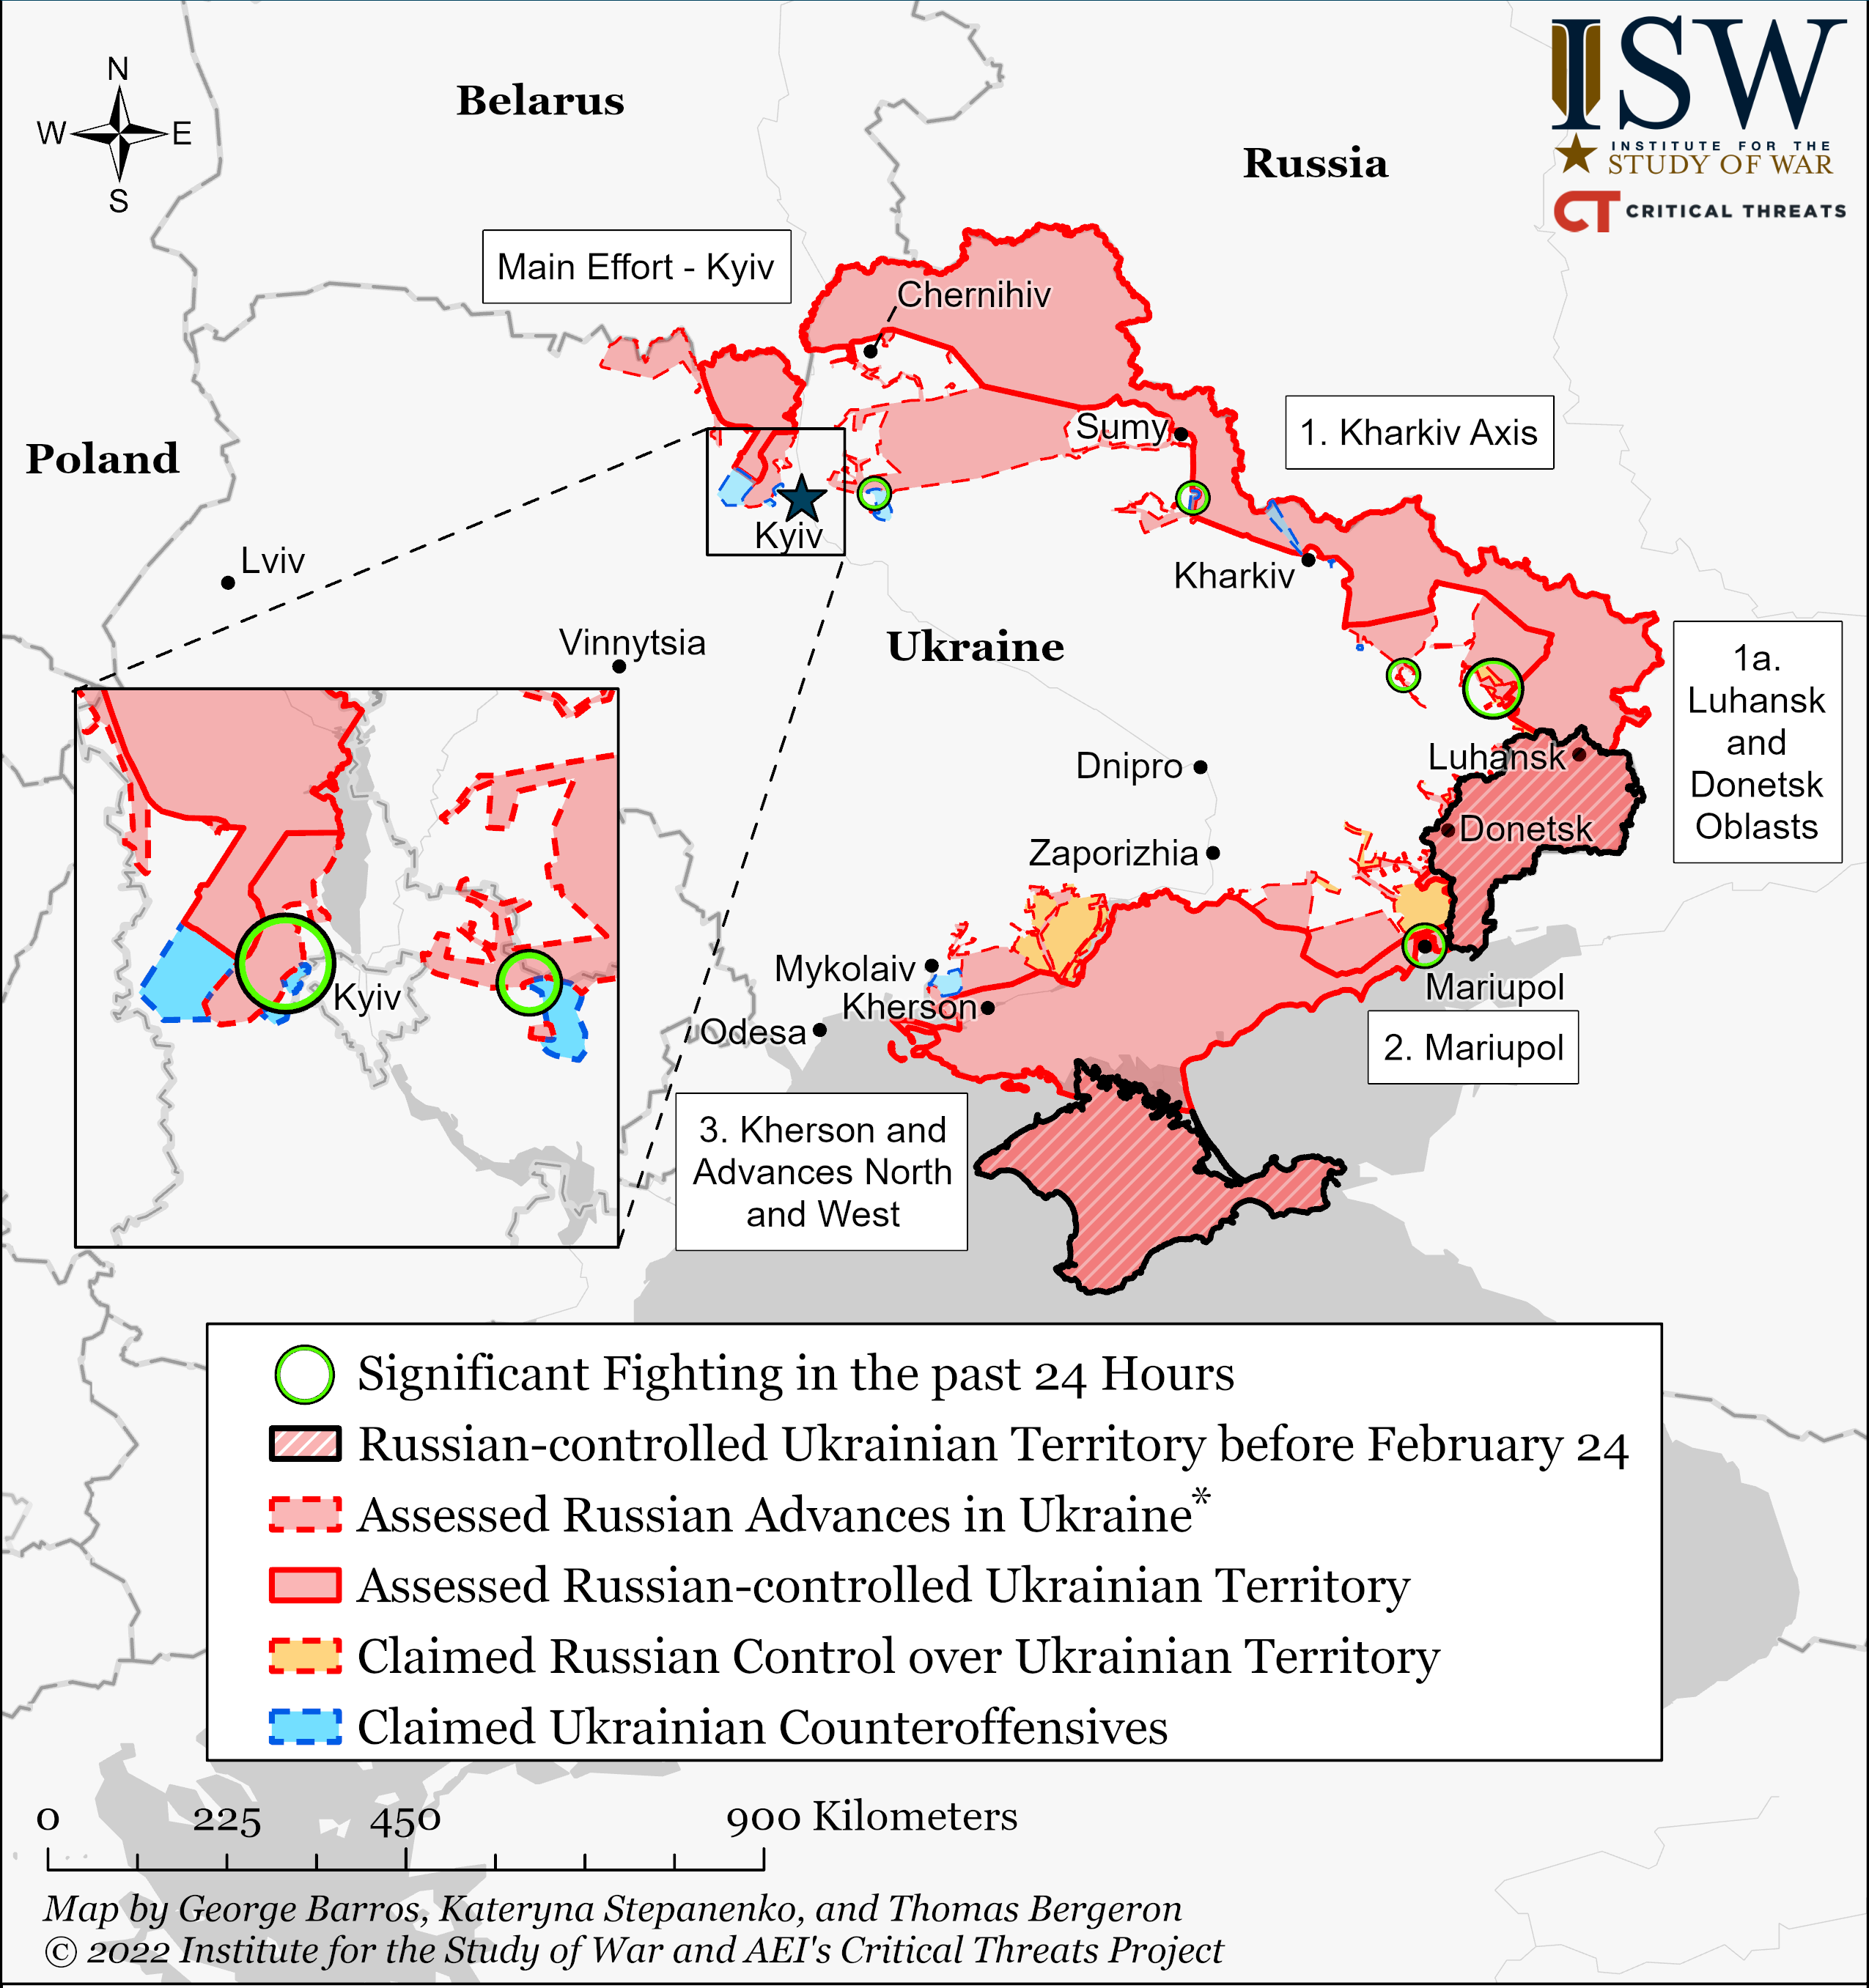

In [55]:
from IPython.core.display import display
from PIL import Image
import urllib.request

# Downloading dataset
urllib.request.urlretrieve("https://cdn.vox-cdn.com/uploads/chorus_asset/file/23351348/DraftUkraineCoTMarch28_2022.png", "study_of_war.jpg")

# Read image
img = Image.open('Study_of_war.jpg')

# Display Image specs
display(img)

### Problem 2

##### Find the total number of Prisoners of War per day recorded in the Personel table.


Total Prisoners of War as at 03/31/2022 is 11101


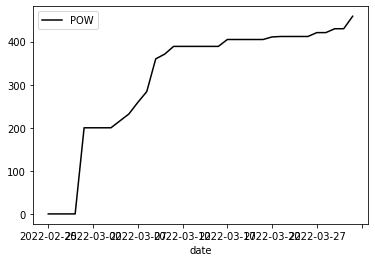

In [54]:
russian_personnel.plot(x='date', y='POW', kind='line', color='black')

p = sum(russian_personnel['POW'])
print(f'Total Prisoners of War as at 03/31/2022 is {p}')


### Problem 3

##### List the total equipment lost per day and equipment type.


In [58]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

x=russian_equipment['date']
y0=russian_equipment['aircraft']
y1=russian_equipment['helicopter']
y2=russian_equipment['tank']
y3=russian_equipment['APC']
y4=russian_equipment['field artillery']
y5=russian_equipment['MRL']
y6=russian_equipment['military auto']
y7=russian_equipment['fuel tank']
y8=russian_equipment['drone']
y9=russian_equipment['naval ship']
y10=russian_equipment['anti-aircraft warfare']
y11=russian_equipment['special equipment']
y12=russian_equipment['mobile SRBM system']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y0, mode='lines+markers', name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Tank'))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='APC'))
fig.add_trace(go.Scatter(x=x, y=y4, mode='lines+markers', name='Field Artillery'))
fig.add_trace(go.Scatter(x=x, y=y5, mode='lines+markers', name='MRL'))
fig.add_trace(go.Scatter(x=x, y=y6, mode='lines+markers', name='Military Auto'))
fig.add_trace(go.Scatter(x=x, y=y7, mode='lines+markers', name='Fuel Tank'))
fig.add_trace(go.Scatter(x=x, y=y8, mode='lines+markers', name='Drone'))
fig.add_trace(go.Scatter(x=x, y=y9, mode='lines+markers', name='Naval Ship'))
fig.add_trace(go.Scatter(x=x, y=y10, mode='lines+markers', name='Anti-Aircraft Warfare'))
fig.add_trace(go.Scatter(x=x, y=y11, mode='lines+markers', name='Special Equipment'))
fig.add_trace(go.Scatter(x=x, y=y12, mode='lines+markers', name='Mobile SRBM System'))

fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"), title="Weapons lost: Ground, Other", xaxis_title="Date", yaxis_title="Weapons", margin=dict(l=0, r=0, t=30, b=0))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Problem 4

##### ???


### Problem 5

##### Is there any correlarion between the POW and equipment loss?


<AxesSubplot:title={'center':'Correlation data for POW and Equipment Loss'}>

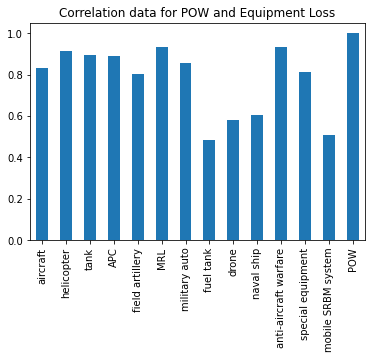

In [50]:
import pandas as pd

merged = pd.merge(russian_equipment, russian_personnel)
merged.drop(['date', 'day', 'personnel', 'personnel*'], axis=1).corr()['POW'].plot.bar(title='Correlation data for POW and Equipment Loss')

### Problem 6

##### What inferences can you make from the above relationship?


In [51]:
print('''
    There is a very strong, positive, direct corralation between POW and overall Equipment Loss. As the number of Prisoners os was increases,
    so deos the overall amount of equipment lost. The streanth in correlation, ignoring POW's direct relationship, ranges from .93 (helicopter) to .48 (fuel tanks).
    The Median correlation is .84 which falls between aircrafts and military auto. It is then valid to conclude that as the invasion continues, and POW increases so will
    overallall equipment loss.
    
    ''')


    There is a very strong, positive, direct corralation between POW and overall Equipment Loss. As the number of Prisoners os was increases,
    so deos the overall amount of equipment lost. The streanth in correlation, ignoring POW's direct relationship, ranges from .93 (helicopter) to .48 (fuel tanks).
    The Median correlation is .84 which falls between aircrafts and military auto. It is then valid to conclude that as the invasion continues, and POW increases so will
    overallall equipment loss.
    
    
